## Supervised Learning - Building a Student Performance Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this is a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [0]:
#Import all the necessary modules
import numpy as np
import pandas as pd


#importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#importing preprocessing package
from sklearn import preprocessing as pp

#importing the train/test splitter
from sklearn.model_selection import train_test_split

#importing the model - Logistic Regression
from sklearn.linear_model import LogisticRegression



In [0]:
# Data Located at :
url = "https://raw.githubusercontent.com/GreatLearningAIML1/bangalore-aug19-batch-knightriderX/master/students-data.csv?token=ABRYHI2WXTW6QBMPIN4MFEK5VPMEU"

In [92]:
studentData_df = pd.read_csv(url,sep=';')
studentData_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [93]:
studentData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [94]:
studentData_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [95]:
studentData_df.index.name = "number"
print(studentData_df.index.name)
print("\nChecking if there are any missing values...")
print(studentData_df.isnull().sum())
studentData_df[studentData_df.isnull().any(axis=1)]

number

Checking if there are any missing values...
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


KG : Seems like there are no missing values...

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [96]:
studentData_df.select_dtypes(include='object', exclude='int64').columns # as of now, two datatypes were observed from info() above

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [97]:
print(studentData_df.select_dtypes(include='int64').columns)
studentData_df_var_col = []
studentData_df_var_index = []

for i, col_name in enumerate(studentData_df.select_dtypes(include='int64').columns):
  if(np.var(studentData_df[col_name])<1):
    studentData_df_var_col.insert(i,col_name)
    studentData_df_var_index.insert(i,np.var(studentData_df[col_name]))


print(studentData_df_var_col,studentData_df_var_index)


Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')
['traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'Dalc'] [0.48528120493511, 0.7025412594135564, 0.5516167280884448, 0.8019612241627959, 0.9951994872616567, 0.79141163275116]


In [98]:
studentData_df_final = studentData_df.drop(['traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'Dalc'],axis=1 )
studentData_df_final.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'goout',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [99]:
studentData_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 27 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
goout         395 non-null int64
Walc          395 non-null int64
health        395 non-null int64
absences      395 non-null int64
G1            395 non-null int64
G2            395 non-null int64
G3            395 no

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [101]:
print(studentData_df_final.head())

labelEncoder = pp.LabelEncoder()
studentData_df_final.apply(labelEncoder.fit_transform)

#studentData_df_final = labelEncoder.fit_transform(studentData_df_final)

print(studentData_df_final.head())

       school sex  age address famsize  ... health  absences  G1  G2  G3
number                                  ...                             
0          GP   F   18       U     GT3  ...      3         6   5   6   6
1          GP   F   17       U     GT3  ...      3         4   5   5   6
2          GP   F   15       U     LE3  ...      3        10   7   8  10
3          GP   F   15       U     GT3  ...      5         2  15  14  15
4          GP   F   16       U     GT3  ...      5         4   6  10  10

[5 rows x 27 columns]
       school sex  age address famsize  ... health  absences  G1  G2  G3
number                                  ...                             
0          GP   F   18       U     GT3  ...      3         6   5   6   6
1          GP   F   17       U     GT3  ...      3         4   5   5   6
2          GP   F   15       U     LE3  ...      3        10   7   8  10
3          GP   F   15       U     GT3  ...      5         2  15  14  15
4          GP   F   16      

## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [102]:
for col in ['G1','G2','G3']:
  studentData_df_final[col] = studentData_df_final[col].apply(lambda x: 1 if x >=10 else 0)

studentData_df_final.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no,4,1,3,6,0,0,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,no,yes,no,no,no,yes,yes,no,3,1,3,4,0,0,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no,2,3,3,10,0,0,1
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes,2,1,5,2,1,1,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,no,yes,yes,no,yes,yes,no,no,2,2,5,4,0,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [103]:
studentData_df_final.columns
#x = studentData_df_final.values[:studentData_df_final.columns.len]

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'goout',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

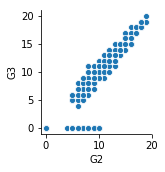

In [106]:
#sns.pairplot(x_vars='G2',y_vars='G3',data=studentData_df_final)
sns.pairplot(x_vars='G2',y_vars='G3',data=studentData_df)


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

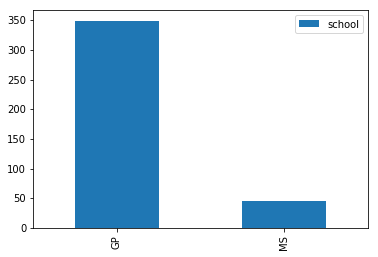

In [113]:
studentData_df_final['school'].value_counts().plot(kind='bar',legend=True)

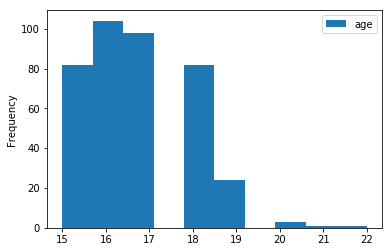

In [114]:
studentData_df_final['age'].plot(kind='hist',legend=True)

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

# Naive bayes with Iris data

### Import Iris.csv

In [0]:
# Data Located at :
url = "https://raw.githubusercontent.com/GreatLearningAIML1/bangalore-aug19-batch-knightriderX/master/iris_external.csv?token=ABRYHI66OJ62LLCGHSSFKNS5VQN4S"

In [0]:
iris_df_raw = pd.read_csv(url)

In [69]:
iris_df_raw.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [67]:
iris_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length (in cm)    150 non-null float64
Sepal Width in (cm)     150 non-null float64
Petal length (in cm)    150 non-null float64
Petal width (in cm)     150 non-null float64
Class                   150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [76]:
iris_df_raw.describe()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [0]:
# 'Species' is the column 'Class'
array = iris_df_raw.values
X = array[:,0:4]
Y = array[:,4]

### Find the distribution of target variable (Class)

In [83]:
# Y is target variable containing values of 'Class'
iris_df_raw['Class'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Class, dtype: int64

### Plot the distribution of target variable using histogram

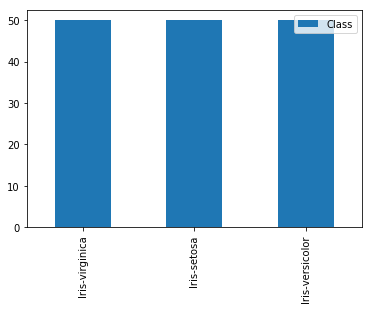

In [124]:
iris_df_raw['Class'].value_counts().plot(kind='bar',legend=True)
#iris_df_raw['Class'].plot(kind='hist',legend=True)


#["Class"].plot(kind="hist")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

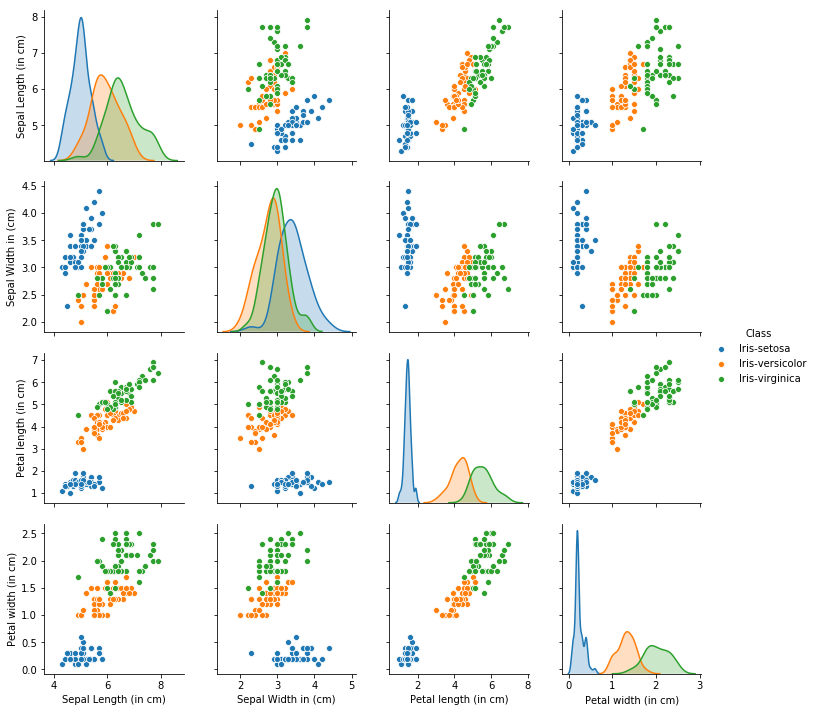

In [122]:
sns.pairplot(iris_df_raw,hue='Class')

KG: the three difference classes are clearly distinguishable by their characteristic attributes - in most cases. Seems like when it is difficult to identify the class by one attribute, the combination of other other attributes might help. 

### Summary Statistics and explain insights for at least 2 variables

In [125]:
iris_df_raw.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sepal Length (in cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal Width in (cm),150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
Petal length (in cm),150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
Petal width (in cm),150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


KG: 

### Correlation among all variables and give your insights

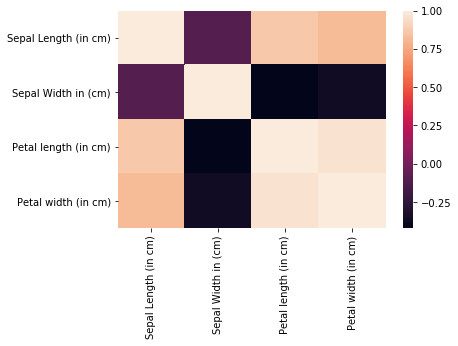

In [126]:
sns.heatmap(iris_df_raw.corr())

KG: Petal length has a strong correlation with petal width while, Sepal Length also has strong correlation with Petal Length and Petal Width.

### Split data in Training and Validation in 80:20

In [0]:
X = iris_df_raw.drop('Class',axis=1)
Y = iris_df_raw['Class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20,random_state=1)

### Do Feature Scaling

### Train and Fit NaiveBayes Model

In [0]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [133]:
NaiveBayesModel = GaussianNB()
NaiveBayesModel.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [135]:
Y_pred = NaiveBayesModel.predict(X_test)
print("####### Classification Report ###############")
print(metrics.classification_report(Y_test, Y_pred))

print("####### Confusion Matrix ####################")
print(metrics.confusion_matrix(Y_test, Y_pred))

####### Classification Report ###############
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

####### Confusion Matrix ####################
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [0]:
accuracy = 